**Coursebook: Neural Network and Deep Learning**

- Part 11 of Data Visualization and Machine Learning for PT Sinar Mas Mining
- Course Length: 9 hours
- Last Updated : December 2022

___

- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background
The coursebook is part of the **Data Science in Python Specialization** prepared by [Algoritma](https://algorit.ma). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

## Training Objectives

This coursebook is intended for participants who have completed the preceding courses offered in the **Data Science in Python Specialization**. This is the eleventh course, **Neural Network and Deep Learning** 

**Course Objective**:

**Neural Network Architecture**

- Neurons 
- Layers
- Activation function
- Cost Function 
- Feedforward 
- Backpropagation 


**Work with Neural Network using Keras**

- Building and compiling neural network model
- Training neural network model
- Evaluation performance and make predictions
- Model Save and Loads
- Tensorboard

**Optimization**

- Learning Rate
- Epoch
- Dropout Rate
- Adagrad / Adam
- Mini-batch Stochastic

**Convolutional Neural Network**

- CNN Concepts (Kernel convolutionals, strides, padding, filter)
- CNN in Keras
- Data Augmentation
- Practical: Image classification on Steel Defect Detection

In [1]:
import datetime
import json
from tqdm import tqdm 

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow.keras as keras
# import tensorflow_datasets as tfds

# Neural Network


Deep learning is an exciting invention that has risen in popularity in recent years, but it's beginnings traced back to the 1950s when the earliest prototypes of **artificial neural network** algorithms were created. The algorithm is named so because it is inspired from our understanding at that time of how our biological brain responds to stimuli from sensory inputs. That is not to say that neural networks are valid representations of how our biological brain works - quite far from that! In fact, the over-sensationalization of neural network is in my opinion doing more harm to actual science than good. 

## Neuron / Perceptron


To date, there are some school of thoughts that hypothesized about how our brain works. There's [the grandmother cell theory](https://en.wikipedia.org/wiki/Grandmother_cell), which hypothesized that "neurons represent a complex but specific concept or object". It was proposed by neuroscientists Jerry Lettvin, who suggested the notion of hyper-specific neurons that is activated by very specific prompts, such as upon hearing the mention of your grandmother, or seeing pictures of them. Advocates of this theory points to studies where participants were shown three to seven different "target" pictures of 132 photo subjects while having being observed - the researchers measured the electrical activity (activation) of the neurons connected to the electrodes and observe how neurons "almost ignored all other photos but fired steadily each time Aniston appeared on screen". 

Other theories assert that neurons are far simpler and that the representation of complex objects are distributed across many neurons. So while the human brain is extremely complex, with around 100 billion neurons and 1,000 trillion synaptic interconnections, each neuron rely on layers of electrochemical signaling and other biological machinery to process information. 

Artificial neural networks are loosely derived from this second set of theories. A neural network architecture comprised of an arrangement of "layers" and "nodes" (representing neurons) such that "information" flows from one later and relayed to another. 

[Neuroscientists]((http://learn.genetics.utah.edu/content/neuroscience/neurons/)) learn that:  
- Information from one neuron to another across a small gap called a synapse
- One sending neuron can connect to several receiving neurons  
- One receiving neuron can connect to several sending neurons  

Human Neuron  

![neuron](assets/neuron.png) 

Artificial Neural Network's Neuron

![neuron](assets/neuron_model.jpeg)

## Implementing Neuron with Keras 

To give more understanding on how a single neuron works, let's start by implementing a model consisted of single neuron using keras

For this example we are going to use a dummy data consisted of `x` as predictor and `y` as target variable. The task is to create model that could predict `y` based on `x` value.

In [2]:
# Create quick example of x and y data
x_train = np.array([1,2,3,4,5,10]) # Predictor
y_train = np.array([3,5,7,9,11,21]) # Target Variable

x_test = np.array([16, 17, 18, 19, 20, 100, 200])
y_test = np.array([33, 35, 37, 39, 41, 201, 401])

**1. Model Initialization** 

The first step in creating a model is by initialize it. In keras, we can use `keras.Sequential()` method to create a sequential model object

In [3]:
# Model Initialization
model = keras.Sequential()

In [4]:
# Develop model blueprints 
model.add(keras.layers.InputLayer(input_shape=[1]))
model.add(keras.layers.Dense(units=1))

**2. Model Compilation**

Once the model design is created, it should be compiled with correct **loss function** (cost function) and **optimizer** to measure its performance during training. If you don't quite understand how optimizer works, don't worry since we will talk about it later in this course.

In [5]:
# Model Compilation
model.compile(optimizer='SGD', loss='mean_squared_error')

Here's an illustration of model we have created in previous cell 

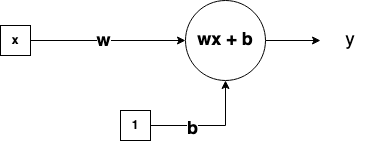

Once you have created your model, you might curious about the value of each weights (w and b). By default, keras will random the values using [glorot normal distributions](https://keras.io/api/layers/initializers/). To see the weights you can call the code presented below and you should see each time you initialize a model, the weights changes. 

In [6]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1258992]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

**3. Model Train**

The training process in neural network architecture is a bit different from other models. It consists of two processes named:

1. Feedforward : A process to deliver the data into model and creating the output (in this case, the predicted y or usually denoted as  $\hat{y}$)
2. Backpropagation : A process to evaluate error/loss between $\hat{y}$ and $y$, then update the model in order to improve its performance later

The whole process of feedforward and backpropagation is done when we are calling the `.fit()` function below:

In [7]:
# train the model
model.fit(x_train,y_train, verbose=1)

1/1 [==============================] - 0s 431ms/step - loss: 28.0222


Once your training is done, you should see the model weights should be close to $2x + 1$ formula.

In [8]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.6608512]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.09284173], dtype=float32)>]

**4. Model Evaluation**

In previous example we can measure model's performance on how close it is to create the $2x+1$ formula. But in reality, we don't even know the formula for our data. Hence, we usually rely on the test performance of our model. Just like the previous course, we can utilize our test data then compare the training performance and test performance to make conclusion

In [9]:
# use the model to predict y out of x
model.predict([1000])

array([[1660.9441]], dtype=float32)

In [10]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 113ms/step - loss: 883.4738


883.4737548828125

In [11]:
model.evaluate(x_train, y_train)

1/1 [==============================] - 0s 23ms/step - loss: 6.3582


6.358179569244385

## Dive Deeper : Feed more data on Neural Network Model

*Estimated Time : 10 minutes*

Previously, we already see that our data performs well on the training set (small values) but has difficulties in predicting the test set. One of the perk from using machine learning is that it should learn well from a lot of data. 

Now try to create **larger** train data especially on bigger values and see how the model responds to that. 

1. Re-write your new `larger_x_train` and `larger_y_train` here
2. Create new model named `model2`
3. Train the model and see if there is any differences 
4. Evaluate the model

In [12]:
# Your Code Here 
# 1. Create your new train dataset which 
larger_x_train = []
larger_y_train = []

In [13]:
# Your Code Here 
# 2. Create model2 with same architecture as model1

In [14]:
# Your Code Here 
# 3. Train model2 with same epochs as model1 

In [15]:
# Your Code Here 
# 4. Evaluate model2 with x_test and y_test 

## Multi Layer Perceptron

According to its names, neural network architecture are set of neurons connected each others and it consists of 3 types of layers : 

1. Input layer 
2. Hidden layer
3. Output layer

Since the architecture is  formed from multiple layer of perceptron, some called it multi-layer perceptron (MLP). Some other called it artificial neural network, or neural network for short. The original terms of deep learning comes when a neural network has lots of hidden layer forming a "deep" stack of layers. Below are the reference of the different architecture


![image](assets/nondeep.png)

**Implementing Neural Network**

*For reading convenience, we separate the steps into*:

1. Data Preparation
2. Modeling 
3. Training

**1. Data Preparation** 

For this part, we are going to use Radon contamination datasets provided in our data directory

In [16]:
radon = pd.read_csv('data/radon.csv')

Radon is a radioactive gas that enters homes through contact points with the ground. It is a carcinogen that is the primary cause of lung cancer in non-smokers. Radon levels vary greatly from household to household. This dataset contains measured radon levels in U.S homes by county and state. The 'activity' label is the measured radon concentration in pCi/L. Important predictors are 'floor' (the floor of the house in which the measurement was taken), 'county' (the U.S. county in which the house is located), and 'Uppm' (a measurement of uranium level of the soil by county).

The dataset was originally published on http://www.stat.columbia.edu/~gelman/arm/examples/.

If you are curious about the usage of the data, we recommend to go for its author's book, [Data Analysis using Regression and Multilevel/Hierarchical Models by Andrew Gellman](http://ecologia.ib.usp.br/curso_r/lib/exe/fetch.php/bie5782:00_curso_avancado:uriarte:gelman_hill2007_data_analysis_using_regression_and_multilevel-hierarchical_models.pdf).


<!-- 

alternative and recomended code to retrieve the dataset us by using tnsorflow_datasets

import tensorflow_datasets as tfds
ds_train, ds_info = tfds.load('radon',split='train', with_info=True)
df_train = tfds.as_dataframe(ds_train, ds_info) -->

In [17]:
radon.head()

activity     Uppm       adjwt basement  cntyfips                   county  \
0       1.6  2.49759  292.219543     b'N'         3  b'ALLEN               '   
1       0.5  2.66527  364.958313     b'N'        25  b'YAVAPAI             '   
2       3.0  2.43343  626.564575     b'Y'        17  b'MIDDLESEX           '   
3       0.6  2.43343  570.611755     b'N'        17  b'MIDDLESEX           '   
4       1.2  2.10811  426.798859     b'Y'        95  b'JACKSON             '   

   dupflag  floor  idnum        lat  ...  state2  stfips  stopdt  stoptm  \
0        0      1   1681  41.091000  ...   b'IN'      18   11689    2235   
1        0      1   1457  34.599998  ...   b'AZ'       4   22888    1010   
2        0      0   4224  42.485001  ...   b'MA'      25   32488    1000   
3        0      1   4094  42.485001  ...   b'MA'      25   32688    1200   
4        0      0   6849  39.007999  ...   b'MO'      29   32488     610   

   stratum  typebldg  wave windoor    zip  zipflag  
0        2         1    92    b' '  46835        0  
1        2         1    56    b' '  86325        0  
2        1         1    23    b' '   1778        0  
3        1         1    62    b' '   1432        0  
4        2         1    91    b' '  64134        0  

[5 rows x 28 columns]

For simple example, we will take few numeric variable to predict the radon concentration (activity)

In [18]:
# Sample dataset
y = radon['activity']
x = radon[['floor', 'Uppm', 'adjwt', 'typebldg']]

**2. Modeling** 

To save you some times on building neural network model, here is the example on how to build one:

In [19]:
# Code for basic neural network in predicting radon concentration 

# Model Initialization 
model_nn = keras.Sequential()

# Add input layer
model_nn.add(keras.layers.InputLayer(input_shape = 4))

# Add hidden layer
model_nn.add(keras.layers.Dense(units=4, activation='relu'))

# Add output layer
model_nn.add(keras.layers.Dense(units=1))

# Model compile
model_nn.compile(optimizer='rmsprop', loss='mean_squared_error')

Once the model is created, we can always see it's summary to illustrate how our final model architecture is. This step is trivial but it has big impact on making sure the model architecture was built according to our means. 

In [20]:
# Show model summary
model_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


Please take a look and notice the differences between this model and the previous one. On the code above, we added a few parameters that you might consider to pay attention into: 

- `units` : Number of specific neurons in one layer
- `activation` : Activation function to map the value processed by each neuron and "activate" the neuron

Here's an illustration on how neural network doing **feedforward** to classify an image data. Pay attention to the number of neurons on each layers and how the neurons changed color into white. 




How activation works  |  Human Tongue Sensitivity
-- | --
![](assets/DeafeningComplicatedBluetonguelizard-size_restricted.png) | ![](assets/tongue-map-217x300.jpg)

From above illustration, `units` parameter will adjust the number of neurons in each layer. While the `activation` functions will make each neurons to **active state** based on the data its fed into. 

This indicate that each neuron in one layer works independently and has its own **sensitivity**. A very common illustration is how our tongue works. Some neurons are sensitive to bitterness, some are sensitive to sourness, saltiness, or sweetness. Whenever we are eating something sweet, the sweet neurons will be activated the most since it has the most sensitivity to sweetness. Hence, our brain processes that if the active neurons are sweet neurons then the taste is sweet. 

*You can always rever for available activation function from [tensorflow.keras.activation documentation page](https://www.tensorflow.org/api_docs/python/tf/keras/activations). Some of them will be discussed later in model optimization sub-chapter*

**3. Model Training**

In [21]:
# Model Train
model_nn.fit(x, y, epochs=20)

Epoch 1/20
393/393 [==============================] - 1s 1ms/step - loss: 1481.9144
Epoch 2/20
393/393 [==============================] - 0s 1ms/step - loss: 88.6249
Epoch 3/20
393/393 [==============================] - 0s 1ms/step - loss: 87.2093
Epoch 4/20
393/393 [==============================] - 0s 1ms/step - loss: 86.5896
Epoch 5/20
393/393 [==============================] - 0s 1ms/step - loss: 86.0130
Epoch 6/20
393/393 [==============================] - 0s 1ms/step - loss: 85.8538
Epoch 7/20
393/393 [==============================] - 0s 1ms/step - loss: 85.5589
Epoch 8/20
393/393 [==============================] - 0s 1ms/step - loss: 85.2549
Epoch 9/20
393/393 [==============================] - 0s 1ms/step - loss: 85.0473
Epoch 10/20
393/393 [==============================] - 0s 1ms/step - loss: 84.8248
Epoch 11/20
393/393 [==============================] - 0s 1ms/step - loss: 84.5085
Epoch 12/20
393/393 [==============================] - 0s 1ms/step - loss: 84.1827
Epoch 13/20

You might see that using the provided model example, the model performance during training reach its saturated point (based on loss) at some point. This condition is called **convergence** state, indicating that our model has reach its top performance and cannot do better (optimal). 

The fun fact is we can never tell if the model can perform better if we continue to train it. Hence, we use epochs to limit the model training not knowing if the model is optimal or not. 

Later in this course we will learn a way to stop training other than `epochs`, and it will utilize keras `callback` function. But for now, it's enough just to understand the basic neural network architecture. Next step is to implement neural network on image data

## Gradient Descent and Optimizer

If you are learning to optimize a model, the perfect start is by understanding how the model learns and optimize it later.

**Gradient Descent**

Previously when we first create our first neural network, the training process might looks like magic. If we oversimplify it, the model tries to predict some value (feedforward) and then utilize the loss/error created by the difference from predicted value over its targetted value. This error then will be used as information on how the model should be learn. 

However there is no magic at all. It's all made by mathematical approach algorithm called gradient descent. Gradient descent is the most suitable learning mechanism for neural network architecture since it allows the model to learn over time. The original gradient descent optimization function usually referred as "Vanilla Gradient Descent". Even so, it shows several flaws over difference case of data and problems. To date, there are lots of alternative learning mechanism that performs better than gradient descent. To learn that, we could start on how gradient descent works : 


How gradient descent works:

![](assets/graddesc.png) 



Gradient descent formula:

![](assets/updaterule.png)



<!-- <img src="https://drive.google.com/uc?export=view&id=1JTpqKLot4IEHqnO-JROXDiv07Xd6K3JO" width="50%"> -->

A few example of gradient descent optimizer are: 

- Vanilla Gradient Descent : Known as the original gradient descent using first order optimization 
- Stochastic Gradient Descent (SGD) : Just like Vanilla Gradient Descent, but works stichastically (one data per update). 
    
    
**Momentum and Adaptive Learning**

- Adaptive Moment (Adam)

[original paper](https://arxiv.org/pdf/1412.6980.pdf)


- RMSProp 

RMSProp (Root Mean Square Propagation) is an unpublished adaptive learning rate optimizer proposed by Geoff Hinton. The motivation is that the magnitude of gradients can differ for different weights, and can change during learning, making it hard to choose a single global learning rate. RMSProp tackles this by keeping a moving average of the squared gradient and adjusting the weight updates by this magnitude. 

[original course](https://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6.pdf)

## Neural Network for Image Classification

We have previously implement neural network architecture for regression problem. This part we will try to cover the classification case, but not only that, we will also implement neural network to deal with image (or larger) dataset. 

For easy and simple example, we will use the mnist dataset publicly known as the "hello world" dataset for image classification. This code will download keras sample dataset if we have not already downloaded it. 

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('data type \t: ', type(x_train), type(y_train))
print('training size \t: ', x_train.shape, y_train.shape)
print('Test size \t: ', x_test.shape, y_test.shape)

data type 	:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
training size 	:  (60000, 28, 28) (60000,)
Test size 	:  (10000, 28, 28) (10000,)


One thing that we have to make sure before building a model for image classification is that we have to **know the data characteristic**. It will help us in designing the model later. 

So the first thing we could try is to see the image itself for each classes. Below code will create a quick sample visualization for each class


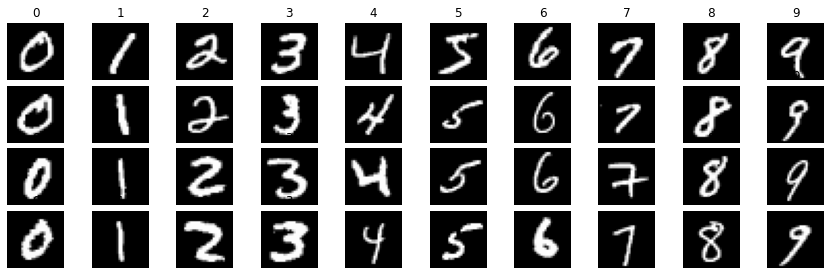

In [23]:
# Visualizing sample image dataset
fig, ax = plt.subplots(4,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(10):
    for j in range(4):
        idx = np.where(y_train == i)[0][:4]
        ax[j,i].imshow(x_train[idx[j]], cmap='gray')
        ax[j,i].set_title(y_train[idx[j]])
        ax[j,i].axis('off')

plt.show()

**Model Implementation**

Once we have learn how the data looks like, it's now time to implement the correct model architecture.
As usual, we give an example on how to create neural network that handles image data. Have a look and pay attention to every changes from previous model that learns structured data.

In [24]:
# Model Init
model_mnist = keras.models.Sequential(name='model_mnist')

# Input Layer
model_mnist.add(keras.layers.InputLayer(input_shape = (28,28)))

# Hidden Layer
model_mnist.add(keras.layers.Flatten(name='flatten_layer'))
model_mnist.add(keras.layers.Dense(units=10, activation='relu', name='hidden_layer_1'))
model_mnist.add(keras.layers.Dense(units=4, activation='relu', name='hidden_layer_2'))

# Output layer
model_mnist.add(keras.layers.Dense(units=10, activation='softmax', name='output_layer'))

# Model compile
model_mnist.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model_mnist.summary()

Model: "model_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_layer (Flatten)     (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 10)                7850      
                                                                 
 hidden_layer_2 (Dense)      (None, 4)                 44        
                                                                 
 output_layer (Dense)        (None, 10)                50        
                                                                 
Total params: 7,944
Trainable params: 7,944
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [26]:
model_mnist.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2825 - accuracy: 0.1489
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0147 - accuracy: 0.2137
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9576 - accuracy: 0.2342
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6914 - accuracy: 0.2937
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5508 - accuracy: 0.3290
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3942 - accuracy: 0.4148
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2830 - accuracy: 0.4651
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1796 - accuracy: 0.5204
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1046 - accuracy: 0.5670
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.027

**Challenge: create neural network architecture to achieve >99% of accuracy within 10 epoch**

Edit your model_mnist data and share your result!

## Model Optimization

If you did previous challenged, you'd might experience a knowledge on how to improve the model performance. In most cases, building a correct architecture is not enough. We still need to tune some parts of the model in order to optimize it over the data.

Besides determining what optimizer should we used based on the data and architecture, we can also do several other job to optimize the model 

### Hyperparameter Tuning

**Learning Rate**

Learning rate can influence how fast the model will learn. A big learning rate might resulting in faster time to converge but increasing the risk of trapped in local optima. 

**Epoch** 

Large epoch will give the model chance to learn the data more, hopefully resulting in better performance overtime. However, the model might be exposed to the overfit problem

**Activation functions** 

Activation function will squash the summation result that enters into each specific neuron. Different activation function might change how the model learns since it has direct impact on how the derivative in each layer will be evaluated. The extreme case is a wrong choice of activation function might leads into vanishing or exploding gradient problem. 

Here are few most used activation function used in neural networks : 


- Logistic (sigmoid)

Basic activatoin function used to squash information into a value with range 0-1. Best used for traditional binary classification case. 

- Tanh

Behave like sigmoid, with a wider range of values enabling it to deliver more informations

- Rectified Linear unit (ReLU)

Will flatten all negative values into zero. This activation functions helps neural network to overcome the vanishing gradient problem and now become the standard activation function especially in classification case. 

- Softmax

Will compare each value as a probability proportion. Best used as activation function for output layer in classification case. 


![](assets/activation-functions.png)

### Batch Learning

Batch learning does not has something to do with final model performance. However, it affects the memory cost for each model we use. 
Full batch learning will use the whole training set for one update, while partial batch learning will evaluate and update for each batch it has on each epochs. 

The larger the batch size, the more memory it will takes to do one learning cycle (feed forward + backpropagation) but faster learning time. It is recomended to keep the batch low to prevent the model failure when predicting the data. 

You can set the batch size using `batch_size` parameters on `model.fit()`, for example :
```python
model_mnist.fit(x_train, y_train, epochs=10, batch_size = 30)
```

### Knowledge Check : Hyperparameter Tuning
*Estimated time: 15 mins*

Make new neural network models with **different learning rates and activation functions**. Then try to train them using **different batch**. 
Based on your observation, how does learning rate, activation functions, and batch_size affects the model ? 

In [27]:
# Your Code Here

### Regularization

The idea of regluarization is to make the model less overfit by making it more "regular" to learn general data distribution. There are many ways to condust the regularization, but we only cover the most used 3 technique : L1, L2, and using dropout for regularization. All of these three technique can be **implemented on each layer**



**L1 Regularization**

Using l1 regularization, we will debuff the contribution power of each weights $w$ by adding more error metric that has direct impact from the weights $w$ per se. For intuition, let's say we are using Sum Squared Error as the loss function, 

$$\text{loss function}=\sum_{i=1}^{n}(\hat{y}-\sum_{j=1}^{p}w_{j}x_{ij})^2$$

From the SSE function above, we can add the following equation of first norm value for each weights to increase the error and makes the model learning process harder. 

$$\sum_{i=1}^{n}(\hat{y}-\sum_{j=1}^{p}w_{j}x_{ij})^2+\lambda\sum_{j=1}^{p}||w_{j}||$$


If we take a look, once the $\lambda$ is set to $0$, the regularization will take no effect. The larger the value, the harder the model will learns.


**L2 Regularization**

The idea of L2 regularization is pretty much the same as the L1 Regularizaton does. The only difference is that L2 using the squared value of weights to regluarize the model

$$\sum_{i=1}^{n}(\hat{y}-\sum_{j=1}^{p}w_{j}x_{ij})^2+\lambda\sum_{j=1}^{p} w^2_{j}$$


**Dropout Layer**

The dropout layers will works directly on the neurons in each layer by randomly deactivate (set the weight to 0) for each iterations. This is more stochastic method but proven to be works on most neural networks architecture. Below are the illustration on how the dropout layer affects the model : 




![](assets/dropout.png)

The previous three example are the most common way to do a regularization. The very next step is to implement the regularizaotion into our model. 

For l1 and l2 regulizers, we should define a specific regularization function which can be instantiated from the keras.regulizers modul. The following code will create the specific l1 and l2 regularization function. Note that you can create your regulizers as many as you want

In [28]:
# Create regularization function that will be applied on the model 
l1_reg = keras.regularizers.l1(l1=0.01) # l1 will determine how strong the regularization effect will be 
l2_reg = keras.regularizers.l2(l2=0.01) # l1 will determine how strong the regularization effect will be 

On the previous cell, we try to create a isolated regularization function as we are potentially implement it in so many layers (remember DRY princple). 
Once the objects are created, we can implement it on our **dense layers**. Below are the example on implementing it: 

In [29]:
# Model initialization
model_reg = keras.models.Sequential(name="model_reqgularization_example")
model_reg.add(keras.layers.InputLayer(input_shape = (100,100)))

# Regularized layer using L1 or L2
model_reg.add(keras.layers.Dense(units=32, kernel_regularizer = l1_reg)) # Add l1 / L2  regularization function

# Dropout layer that will affect hidden layer 2
model_reg.add(keras.layers.Dense(units=16, activation='relu'))
model_reg.add(keras.layers.Dropout(0.2)) # The dropout layer should be place directly after the layer

model_reg.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model_reg.summary()

Model: "model_reqgularization_example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100, 32)           3232      
                                                                 
 dense_4 (Dense)             (None, 100, 16)           528       
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
Total params: 3,760
Trainable params: 3,760
Non-trainable params: 0
_________________________________________________________________


### Dive Deeper : Implement Regularization 
**Estimated time : 30 mins**

In this section, you are given a fashion mnist dataset. Try to make a classification model that implements the regularization. Please run the following code to load the data 

In [31]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

For the following cells, your job is to :  

1. Inspect the data shape 
2. Create a neural network models with regularization 
3. Train the model (max expochs = 100) 
4. Evaluate the model and draw the conclussion

**Note : save the model in a variable called "model_reg"**

In [32]:
# Inspect the data

In [33]:
# Create the model 

In [34]:
# Train the model 

In [35]:
# Evaluate the model 

Try to  to increase/dicrease the regularization effect and see how the training performance differ. Does regularization makes the learning slower?  Does it help the model to avoid overfit state?

In [36]:
# Your Code Here


___

## Model Reusability

Saving a model is a common practice for reusable purpose but before doing that, it is recomended for you to understand what really being saved. In keras, the model actually consisted of four components : 

1. The model architecture 
2. A set of weights values that act as model "state",
3. An optimizer (defined by compiling the model), and 
4. A set of losses and metrics (defined by compiling the model or calling add_loss() or add_metric()).

So please remember that whenever we save a model, those informations will be saved. The keras api enable us to save all of the components or just a few of them. In order to do that, we can use `save()` method from the model object.

### Save and load whole model 
To save whole model information, we can use `model.save(path)` code. There are two ways to complete the code: 

1. using `model.save('folder')` will save the model as .pb and each components are separated on different files
2. using `model.save('folder/filename.h5')` will save the model as HDF5 file and each components are included within the file

for example, the following code will save the `model_reg` inside a `model` folder
```python 
# Save whole model as archive
model.save('folder/model_name')

# Save whole model as hdf5 format
model.save('folder/model_name.h5')

```

To load the saved model, we can use `keras.models.load_model(path)` method. For example, the following code will load 

```python
model_load = keras.models.load_model('folder/model_name')
model_load = keras.models.load_model('folder/model_name.h5')
```

*Note : Using the `model.save()` method, even if the path does not exists, it will create the directory and eventually save the model.*

**Knowledge Check : Validate the saved models**

Tasks : 

1. Save the `model_reg` previously you created 
2. Load it and save it inside a variable `model_reg_saved`
3. Validate the `model_reg_saved` by either : 
    - check both model architecture 
    - check both evaluation performance 
    - check both prediction and make sure it outputs the very same results


In [37]:
# Save the model 

In [38]:
# Load the model and save it in model_reg_saved

In [39]:
# Validate the model_reg_saved

### Save and load model architecture 

Even it is not common in practice, but if you somehow need to export the model architecture without having to worry about the large weights or if you don't want your students to make sure to make the same architecture, you can export the model config. Here's an example to export model configuration into a json file. 

In [40]:
# Get model configuration 
model_config = model_reg.to_json()

# Dump model_config as json file f
with open('config_model_regularization.json', 'w') as f:
    json.dump(model_config, f)
    
# Load model_config
with open('config_model_regularization.json', 'r') as f:
    model_config_load = json.load(f)
    
# Create new model 
model_reg_arch = keras.models.model_from_json(model_config_load)

Please note that using the `with open(path) as f` will raise an error if the path does not exists. In order to check whether the two models have the same architecture, we can use `model.summary()` method

In [41]:
model_reg_arch.summary()

Model: "model_reqgularization_example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100, 32)           3232      
                                                                 
 dense_4 (Dense)             (None, 100, 16)           528       
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
Total params: 3,760
Trainable params: 3,760
Non-trainable params: 0
_________________________________________________________________


### Save and load model weights

This is the most common practice when sharing a model. Some also called loading a pre-trained model weights as transfer learning. The main benefit is that we do not have to worry about any other models configurations like error, metrics, or optimizer and we can use it as a customization or to conduct a transfer learning (train a pre-trained model on new data or case)

In [42]:
# Save the model weights in h5 format (you can change to tf format)
model_reg.save_weights('model_regularization_weight', save_format='h5')

In order to load a model weight, we need to have the model architecture first. In this example, we will create `model_regularization2` as an architecture with slightly different configuration

In [43]:
model_reg_2 = keras.models.Sequential(name="model_reqgularization_2")
model_reg_2.add(keras.layers.InputLayer(input_shape=(28,28)))
model_reg_2.add(keras.layers.Flatten(name='flatten_layer'))
model_reg_2.add(keras.layers.Dense(units=32, activation='relu', kernel_regularizer = l1_reg, name='hidden_layer_1'))
model_reg_2.add(keras.layers.Dense(units=16, activation='relu', kernel_regularizer = l2_reg, name='hidden_layer_2'))
model_reg_2.add(keras.layers.Dense(units=8, activation='relu', name='hidden_layer_3'))
model_reg_2.add(keras.layers.Dropout(0.5)) # Change the dropout rate from 0.2 -> 0.5
model_reg_2.add(keras.layers.Dense(units=10, activation='softmax', name='output_layer'))
model_reg_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Change the optimizer from 'rmsprop' -> adam

Once the model architecture is created, we can load the weights from the file

In [ ]:
model_reg_2.load_weights('model_regularization_weight')

In [45]:
model_reg_2.evaluate(x_test, y_test)
model_reg_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 50.6691 - accuracy: 0.1185


[50.669124603271484, 0.1185000017285347]

If you take a look on the performance between the two models, it has the same result. This is because the model weight is the same, so the feedforward action will have no differences. 

But if you try to train both model for another 20 epochs, it might behave diffrently. 

For further information about how to save and loads tensorflow/keras models, please refer to its [Official Documentation](https://www.tensorflow.org/guide/keras/save_and_serialize).

## Read Image Dataset 

In previous lesson, we used tensorflow's built-in function to load image data as `tensorflow.dataset` types (see again: mnist/mnist_fashion dataset). But what if we are going to use our own image on disk? Luckily, tensorflow also cover these mechanism within its `image_dataset_from_directory()` function. 

For this example we are going to read **Metal Surface Defect** dataset that already provided inside `data_input/NEU-CLS` folder. Have some time to take a look on its folder structure, and answer the following questions:

1. What is the size of each image? 
2. How many classes do we have for the datasets? 

Those are two basic question you need to consider when first dealing with image data. Once you have your answer, you can expand the following section to see the datasets description and validate your answer. 

<details><summary>Open to see Dataset Description</summary>

In the Northeastern University (NEU) surface defect database, six kinds of typical surface defects of the hot-rolled steel strip are collected:
    
- rolled-in scale (RS), 
- patches (Pa), 
- crazing (Cr), 
- pitted surface (PS), 
- inclusion (In) and 
- scratches (Sc). 

The database includes 1,800 grayscale images: 300 samples each of six different kinds of typical surface defects. The image shape is (200x200x3). Below are the preview of each classes

<img src="https://drive.google.com/uc?export=view&id=1pvW3XSnqac1c8k2RraAuKCBJSKSHkv53" width="50%">

*If you wanted to access the database, you can follow this link : http://faculty.neu.edu.cn/yunhyan/NEU_surface_defect_database.html*
    
    
</details>


Once you have good understanding of the data, it's time to read it using `image_dataset_from_directory()` function. However, you still need to make several adjustments.

In [46]:
# Adjust these constants
# img_height, img_width, img_depth = 28, 28, 1
img_height, img_width, img_depth = 200,200,3
image_shape = (img_height, img_width, img_depth)
batch_size = 32

# Create train set from train folder
train_image = tf.keras.preprocessing.image_dataset_from_directory(
    directory='data/NEU-CLS/train', 
    image_size=(img_height, img_width), 
    batch_size=batch_size, 
)

Found 1440 files belonging to 6 classes.


If you run the code, it will automatically detect the classes according to how many folder we keep the images in. Since we have 6 folders containing the images, tensorflow will assume that there are 6 classes. So make sure your directory is clean to avoid tensorflow accidentally think a folder as a class just because it contains images. 

Once we created the dataset, it doesn't load the images. It just created a batch and map function. The image will be loaded once the training functio is executed. This practice will avoid unnecessary memory usage. To see if we succesfully created the dataset, we can just call the object like below:

In [47]:
print(train_image)

<BatchDataset shapes: ((None, 200, 200, 3), (None,)), types: (tf.float32, tf.int32)>


### Knowledge Check : Read test set

Using the knowledge to create training image dataset, now create a dataset containing the test images. 

In [48]:
# Create test/validation set from test folder


## Dive Deeper : Deliver a machine learning model for Steel Defect Classification

In this section we will try to create a neural network models to classify steel defects. Please make sure you have your `train_image` and `test_image` dataset ready. 

**Tasks**:

1. Create Model Architecture 
2. Train the model 
3. Evaluate and optimize the model (you may use any library learned before)
4. Save model's weight and architecture

**Task 1: Create Model Architecture**

Design your model architecture to classify the data. Please make sure to use correct `input_shape`. As for the loss function, it is recomended to use "sparse_categorical_crossentropy". You may add metrics to interpret the loss during performance. 

In [49]:
# Complete the code to create your model 
model_steel = keras.models.Sequential(name="yourname")

model_steel.add(keras.layers.InputLayer(input_shape=(image_shape)))

model_steel.compile(loss='sparse_categorical_crossentropy')

**Task 2 : Train the model** 

Since we use a keras batch dataset that already consisted of X and y, there is no need to separate the X and y parameters inside the `fit()` function. You can train the model up to 100 epochs. 

In [50]:
# Train the model
# Max epochs for the divedeeper is 100 



**Task 3: Evaluate** 

using the `test_image` data, evaluate the model performance and conclude whether it is underfit, overfit, or neither of them. You may also optimize the model to increase the performance. 

In [51]:
# Evaluate the model 


**Task 4: Save model weights and Architecture** 

each file should follows the format of "\<name>_modelsteel" regardless the extension its used. 

In [52]:
# Save model weights and architecture 



___


**External Links**:

- [Adam](https://arxiv.org/pdf/1412.6980.pdf)
- [HDF5 Data Type](https://support.hdfgroup.org/HDF5/doc1.6/UG/11_Datatypes.html)
- [Keras Sequential Model](https://keras.io/guides/sequential_model)
- [Keras Dense Layer](https://keras.io/api/layers/core_layers/dense/)
- [L1 vs L2 Regularization](https://explained.ai/regularization/L1vsL2.html)
- [Neuron Transmits Messages In The Brain - Genetic Science Learning Center](http://learn.genetics.utah.edu/content/neuroscience/neurons/)
- [Relu](http://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf)
- [RMSProp](https://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6.pdf)




- [Y. Lecun, Mnist Dataset](http://yann.lecun.com/exdb/mnist/)
- [K. Song, Steel Defect Datasets](http://faculty.neu.edu.cn/yunhyan/NEU_surface_defect_database.html)